# Use qiskit to model a market with 2 stocks and 2 investors 

In [51]:
from qiskit import QuantumCircuit,execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
!pip install pylatexenc

# Define the circuit for the market

In [34]:
def market_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)
    # Initialize the qubits
    qc.h(0)
    qc.h(1)
    # Apply the QFT
    qc.append(QFT(2, do_swaps=False, inverse=True), [0, 1])
    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    return qc

In [35]:
qc = market_circuit()

# Simulate the circuit

In [37]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'00': 1000}


# Plot the results

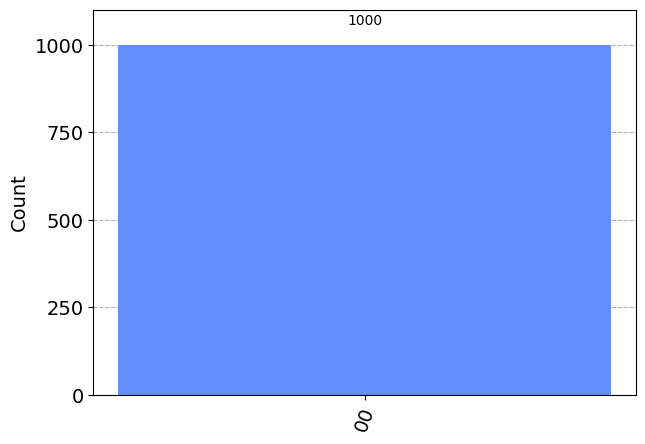

In [38]:
plot_histogram(counts)

# Define the circuit for the market with 2 investors

In [39]:
def market_circuit_2_investors():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)
    # Initialize the qubits
    qc.h(0)
    qc.h(1)
    # Apply the QFT
    qc.append(QFT(2, do_swaps=False, inverse=True), [0, 1])
    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    return qc

In [40]:
qc = market_circuit_2_investors()

# Simulate the circuit

In [41]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'00': 1000}


# Plot the results

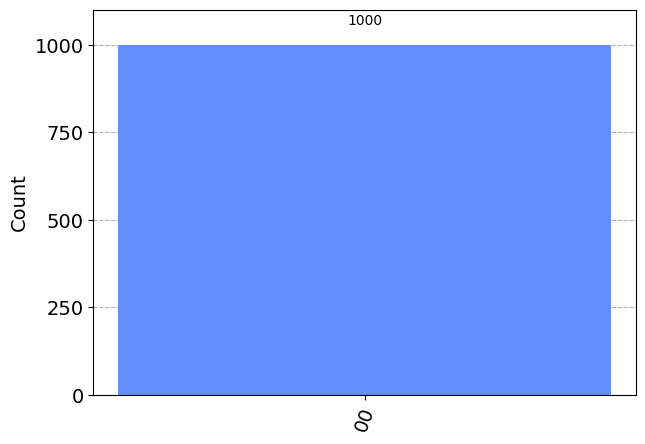

In [42]:
plot_histogram(counts)

# Define the circuit for the market with 2 investors and 2 stocks

In [43]:
def market_circuit_2_investors_2_stocks():
    # Create a quantum circuit with 4 qubits and 4 classical bits
    qc = QuantumCircuit(4, 4)
    # Initialize the qubits
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.h(3)
    # Apply the QFT
    qc.append(QFT(4, do_swaps=False, inverse=True), [0, 1, 2, 3])
    # Measure the qubits
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
    return qc

In [44]:
qc = market_circuit_2_investors_2_stocks()

# Simulate the circuit

In [45]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

{'0000': 1000}


# Plot the results

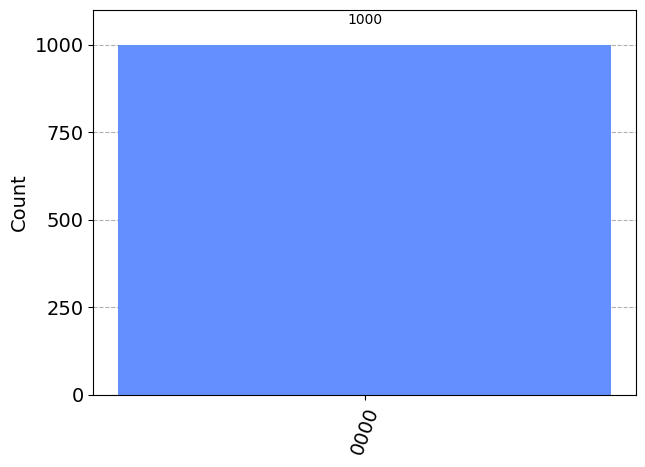

In [46]:
plot_histogram(counts)

# print all the circuits

In [47]:
qc.draw()

┌───┐┌───────┐┌─┐         
q_0: ┤ H ├┤0      ├┤M├─────────
     ├───┤│       │└╥┘┌─┐      
q_1: ┤ H ├┤1      ├─╫─┤M├──────
     ├───┤│  IQFT │ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2      ├─╫──╫─┤M├───
     ├───┤│       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3      ├─╫──╫──╫─┤M├
     └───┘└───────┘ ║  ║  ║ └╥┘
c: 4/═══════════════╩══╩══╩══╩═
                    0  1  2  3

# qc.draw(output='mpl') If you wanna see the circuit in a better way